# RNN -一个for循环，重复使用循环前一次迭代的计算结果
* 环
* 状态
* 时间步

### 简单RNN的numpy描述

In [1]:
import numpy as np

# 输入序列的时间步数
timesteps = 100
# 输入特征空间的维度
input_features = 32
# 输出特征空间的维度
output_features = 64

# 输入数据：随机噪声，仅作为示例
inputs = np.random.random((timesteps, input_features))

# 初始状态：全零向量 （初始状态代表时间步为0的状态）
state_t = np.zeros((output_features, ))

# 创建随机的权重矩阵
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
# input_t是形状为(input_features,)的向量
for input_t in inputs:
    # 由输入和当前状态（前一个输出）计算得到输出
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    # 将输出保存到一个列表
    successive_outputs.append(output_t)
    
    # 更新网络状态，用于下一时间步
    state_t = output_t

# 最终输出是一个形状为(timesteps,output_features)的二维张量 
final_output_sequence = np.stack(successive_outputs, axis=0)

### Keras中的循环层  -  解决梯度消失问题
* LSTM
* GRU

### LSTM的具体例子  -  IMDB电影评论分类问题

In [12]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size=128,
                    validation_split=0.2)


/home/wukong/anaconda3/envs/deeplearning/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.4984 - acc: 0.7650 - val_loss: 0.3612 - val_acc: 0.8628
Epoch 2/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.2930 - acc: 0.8871 - val_loss: 0.3260 - val_acc: 0.8748
Epoch 3/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.2351 - acc: 0.9126 - val_loss: 0.3014 - val_acc: 0.8772
Epoch 4/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.1989 - acc: 0.9283 - val_loss: 0.2858 - val_acc: 0.8836
Epoch 5/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.1781 - acc: 0.9341 - val_loss: 0.3716 - val_acc: 0.8406
Epoch 6/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.1584 - acc: 0.9438 - val_loss: 0.3313 - val_acc: 0.8808
Epoch 7/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.1453 - acc: 0.9484 - val_loss: 0.3108 - val_acc:

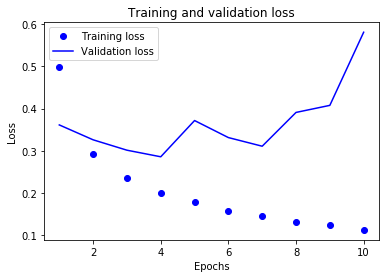

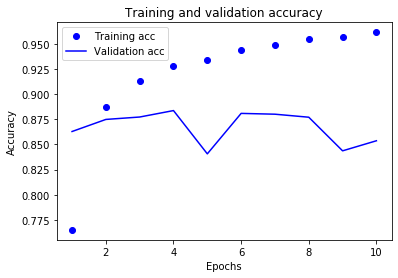

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history             #history对象的history成员
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')     #bo表示圆点，b表示实线
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 分割图像
plt.figure()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



### 循环神经网络的高级用法
* 循环dropout - 降低过拟合
* 堆叠循环层  -  提高网络的表示能力
* 双向循环层  -  提高精度并缓解遗忘问题

### 观察耶拿天气数据集的数据

In [14]:
import os 

data_dir = '/home/wukong/data/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


### 解析数据

In [19]:
import numpy as np

float_data = np.zeros((len(lines), len(header)-1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

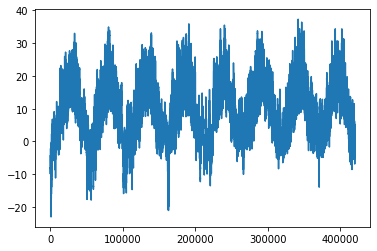

In [20]:
# 绘制温度时间序列
temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)

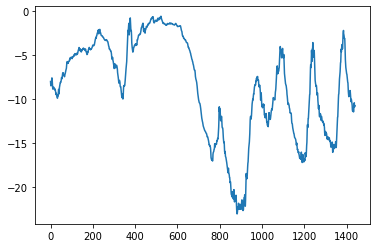

In [23]:
# 绘制前10天的温度时间序列，每10分钟记录一个数据，每天有144个数据点
plt.plot(range(1440), temp[:1440])

### 准备数据
* 一个时间步是10分钟，每steps个时间步采样一次数据，给定过去lookback个时间步之内的数据，能否预测delay个时间步之后的温度
  * lookback = 720：给定过去5天内的观测数据
  * steps =6 ： 观测数据的采样频率是每小时一个数据点
  * delay=144： 目标是未来24小时之后的数据

In [34]:
# 数据标准化
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

# 生成时间序列样本及其目标的生成器(生成一个元祖（samples，targets），samples为输入数据的一个批量，对应的目标温度数组)
# max_index和min_index是数组索引，利于分开数据
# shuffle为打乱样本还是按顺序抽取样本
# batch_size为每个批量的样本数
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay -1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i+batch_size >= max_index:
                i = min_index+lookback
            rows = np.arange(i, min(i+batch_size, max_index))
            i += len(rows)
        
        samples = np.zeros((len(rows), lookback//step, data.shape[-1]))
        targets = np.zeros((len(rows), ))
        for j,row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples,targets

### 准备训练生成器、验证生成器、测试生成器

In [35]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback = lookback,
                      delay = delay,
                      min_index = 0,
                      max_index = 200000,
                      shuffle=True,
                      step=step,
                      batch_size = batch_size)

val_gen = generator(float_data,
                      lookback = lookback,
                      delay = delay,
                      min_index = 200001,
                      max_index = 300000,
                      step=step,
                      batch_size = batch_size)

test_gen = generator(float_data,
                      lookback = lookback,
                      delay = delay,
                      min_index = 300001,
                      max_index = None,
                      step=step,
                      batch_size = batch_size)

# 为了查看整个验证集，需要从val_gen中抽取多次
val_steps = (300000 - 200001 - lookback) // batch_size

test_steps = (len(float_data) - 300001 - lookback) // batch_size 

### 符合常识的评估方法
* 计算符合常识的基准方法的平均绝对误差MAE
* 只有机器学习模型打败了这个常识评估才算有用

In [39]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, -1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

# 将MAE转化为摄氏温度误差
celsius_mae = 0.29*std[1]
print(celsius_mae)

1.0548443431868475
0.2899999999999992


### 训练并评估一个密集连接层
* 在开始研究复杂的且计算代价很高的模型前尝试使用并且简单计算代价低的机器学习模型也很有用

In [40]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs = 20,
                              validation_data = val_gen,
                              validation_steps = val_steps)

Epoch 1/20
500/500 [==============================] - 9s 18ms/step - loss: 1.3674 - val_loss: 0.4603
Epoch 2/20
500/500 [==============================] - 9s 19ms/step - loss: 0.4454 - val_loss: 0.3226
Epoch 3/20
500/500 [==============================] - 9s 18ms/step - loss: 0.3001 - val_loss: 0.1904
Epoch 4/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2722 - val_loss: 0.2556
Epoch 5/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2561 - val_loss: 0.2507
Epoch 6/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2469 - val_loss: 0.2551
Epoch 7/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2409 - val_loss: 0.2357
Epoch 8/20
500/500 [==============================] - 9s 19ms/step - loss: 0.2361 - val_loss: 0.2307
Epoch 9/20
500/500 [==============================] - 10s 19ms/step - loss: 0.2309 - val_loss: 0.2634
Epoch 10/20
500/500 [==============================] - 9s 19ms/step - loss: 0.2256 - val_l

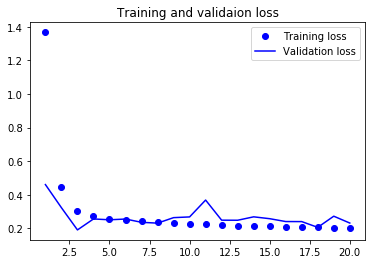

In [41]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validaion loss')
plt.legend()


### 训练并评估一个GRU的模型

In [42]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs = 20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 69s 138ms/step - loss: 0.3028 - val_loss: 0.3009
Epoch 2/20
500/500 [==============================] - 77s 154ms/step - loss: 0.2841 - val_loss: 0.3291
Epoch 3/20
500/500 [==============================] - 74s 147ms/step - loss: 0.2773 - val_loss: 0.3419
Epoch 4/20
500/500 [==============================] - 74s 147ms/step - loss: 0.2754 - val_loss: 0.3437
Epoch 5/20
500/500 [==============================] - 75s 150ms/step - loss: 0.2681 - val_loss: 0.3633
Epoch 6/20
500/500 [==============================] - 73s 145ms/step - loss: 0.2654 - val_loss: 0.3406
Epoch 7/20
500/500 [==============================] - 74s 147ms/step - loss: 0.2594 - val_loss: 0.3081
Epoch 8/20
500/500 [==============================] - 74s 147ms/step - loss: 0.2557 - val_loss: 0.3605
Epoch 9/20
500/500 [==============================] - 75s 150ms/step - loss: 0.2503 - val_loss: 0.3258
Epoch 10/20
500/500 [==============================] - 78s 156ms/step - l

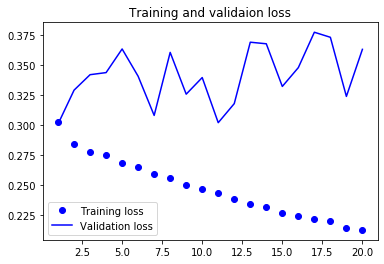

In [43]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validaion loss')
plt.legend()

### 使用循环dropout来降低过拟合
* 对于复杂的模型很容易过拟合，这里是对GRU模型降低过拟合
* 对于某一输入单元随机设为0，打破该层训练数据中的偶然相关性

In [47]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))    # droupout指定该层输入单元的比率   recurrent_dropout指定该层循环单元的dropout比率

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs = 40,   # 使用dropout正则化的网络需要更长时间才能完成收敛
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 73s 146ms/step - loss: nan - val_loss: nan
Epoch 2/40
500/500 [==============================] - 77s 154ms/step - loss: nan - val_loss: nan
Epoch 3/40
500/500 [==============================] - 77s 154ms/step - loss: nan - val_loss: nan
Epoch 4/40
500/500 [==============================] - 76s 153ms/step - loss: nan - val_loss: nan
Epoch 5/40
500/500 [==============================] - 77s 155ms/step - loss: nan - val_loss: nan
Epoch 6/40
500/500 [==============================] - 76s 152ms/step - loss: nan - val_loss: nan
Epoch 7/40
500/500 [==============================] - 77s 154ms/step - loss: nan - val_loss: nan
Epoch 8/40
500/500 [==============================] - 76s 152ms/step - loss: nan - val_loss: nan
Epoch 9/40
500/500 [==============================] - 76s 152ms/step - loss: nan - val_loss: nan
Epoch 10/40
500/500 [==============================] - 76s 152ms/step - loss: nan - val_loss: nan
Epoch 11/40
500/500 [========

### 循环层堆叠  -  增加性能
* 所有中间层都应该返回完整的输出序列（一个3D张量），可以通过指定return_sequences = True 实现

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5,return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))

model.add(layers.GRU(64, activation='relu', dropout=0.1, recurrent_dropout=0.5))

model.add(layers.Dense(1)) 

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs = 40,   # 使用dropout正则化的网络需要更长时间才能完成收敛
                              validation_data=val_gen,
                              validation_steps=val_steps)

### 使用双向RNN  -  深度学习对自然语言处理的瑞士军刀
* 从两个方向查看数据从而得到更加丰富的表示，并捕捉到仅使用正序RNN时可能忽略的一些模式
* 使用Bidirectional层，第一个参数是一个循环层实例

### 训练并评估一个双向LSTM

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split=0.2)

### 训练一个双向GRU

In [ ]:
model = Sequentialuentialuentialuential()
model.add(layers.bidirectional(layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch = 500,
                              epochs = 40,
                              validation_data = val_gen,
                              validtion_steps = val_steps)

* 显然这个双向模型和单向的效果一样，因为在该问题中逆向并没有效果